In [7]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

df_h = pd.read_excel('./hair_dryer_reviews.xltx')
df_p = pd.read_excel('./pacifier_reviews.xltx')

Setup Complete


In [8]:
frames=['marketplace','customer_id','review_id','product_parent']
df_h = df_h.drop(columns=frames)
index = df_h[(df_h['verified_purchase']=='N') | (df_h['verified_purchase']=='n')].index
df_h.drop(index, inplace=True)

In [9]:
df_h.shape

(9811, 13)

In [10]:
frames=['marketplace','customer_id','review_id','product_parent']
df_p = df_p.drop(columns=frames)
index = df_p[(df_p['verified_purchase']=='N') | (df_p['verified_purchase']=='n')].index
df_p.drop(index, inplace=True)

In [11]:
index1 = df_h[(df_h['total_votes']==0) | (df_h['helpful_votes'] / df_h['total_votes'] < 0.5)].index
df_h_done = df_h.drop(index1)

In [12]:
df_h_done.shape

(2754, 13)

In [13]:
index1 = df_p[(df_p['total_votes']==0) | (df_p['helpful_votes'] / df_p['total_votes'] < 0.5)].index
df_p_done = df_p.drop(index1)

In [14]:
df_p_done.shape

(2829, 13)

In [15]:
import datetime
df_h_done['year'] = pd.DatetimeIndex(df_h_done['review_date']).year.astype(str)
df_h_done['month'] = pd.DatetimeIndex(df_h_done['review_date']).month.astype(str)
df_h_done['y_m'] = df_h_done['year'] + '-' + df_h_done['month']

In [16]:
df_h_done.head(2)

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,year,month,y_m
13,B003FBG88E,conair pro styler ionic conditioning hair dryer,Beauty,3,1,1,N,Y,Everything okay but.....!!,I found everything goes well except the plug. ...,8/31/2015,-0.003621,0.184921,2015,8,2015-8
17,B00CC7Y0G4,"remington d3015 ionic ceramic dryer, ionic hai...",Beauty,5,3,3,N,Y,"Works great, I use it 5 days a week","Reckon I have had this about a year now, at le...",8/30/2015,0.213889,0.466667,2015,8,2015-8


In [17]:
import datetime
df_p_done['year'] = pd.DatetimeIndex(df_p_done['review_date']).year.astype(str)
df_p_done['month'] = pd.DatetimeIndex(df_p_done['review_date']).month.astype(str)
df_p_done['y_m'] = df_p_done['year'] + '-' + df_p_done['month']

In [18]:
df_p_done.head(2)

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,year,month,y_m
55,B003CK3LDI,wubbanub infant pacifier - giraffe,Baby,5,2,3,N,Y,MUST buy for new babies,I LOVE WubbaNubs. &#34;Giraffee&#34; is one of...,8/30/2015,0.294862,0.602757,2015,8,2015-8
70,B001AVMF10,"natursutten bpa-free natural rubber pacifier, ...",Baby,2,9,11,N,Y,Other brands are far superior,"Out of all the natural pacifiers out there, th...",8/28/2015,0.154163,0.467293,2015,8,2015-8


In [21]:
df_p_done.groupby('y_m').review_date.count()

y_m
2005-8       2
2006-1       1
2007-1       1
2007-10      4
2007-11      4
2007-6       1
2007-7       1
2007-9       3
2008-1       4
2008-10      2
2008-12      9
2008-2       1
2008-3       1
2008-6       7
2008-8       1
2008-9       8
2009-1       2
2009-10     16
2009-11      5
2009-12     16
2009-2       2
2009-3       1
2009-4       2
2009-6       1
2009-7       2
2009-8       1
2009-9       2
2010-1       3
2010-10      9
2010-11      5
          ... 
2013-4      67
2013-5      45
2013-6      87
2013-7      64
2013-8      64
2013-9      48
2014-1      66
2014-10     58
2014-11     45
2014-12     97
2014-2      87
2014-3      53
2014-4      65
2014-5      52
2014-6      73
2014-7      59
2014-8      77
2014-9      46
2015-1      59
2015-10      8
2015-11     10
2015-12     16
2015-2      87
2015-3      67
2015-4     107
2015-5      61
2015-6     103
2015-7      42
2015-8      61
2015-9      25
Name: review_date, Length: 99, dtype: int64

In [32]:
df_h_done.groupby('y_m').product_category.count().to_frame()

,product_category
y_m,
2004-10,1
2004-11,1
2004-6,2
2005-1,1
2005-11,1
2007-11,2
2007-12,1
2007-2,1
2007-3,1


In [23]:
df_h_res = df_h_done.groupby('y_m').agg(
    {'product_category': 'count',
    'star_rating': 'mean',
    'polarity': 'mean'}
)
df_h_res.head()

,product_category,star_rating,polarity
y_m,,,
2002-2,1,3.0,-0.012833
2002-7,1,5.0,0.256250
2004-8,1,2.0,0.000000
2005-10,1,5.0,0.207143
2005-12,1,5.0,0.122700


In [25]:
df_p_res = df_p_done.groupby('y_m').agg(
    {'product_category': 'count',
    'star_rating': 'mean',
    'polarity': 'mean'}
)
df_p_res.head()

,product_category,star_rating,polarity
y_m,,,
2005-8,2,4.5,0.136563
2006-1,1,5.0,0.358333
2007-1,1,3.0,0.150417
2007-10,4,4.5,0.256458
2007-11,4,3.5,0.332440


In [26]:
df_h_res.rename(columns={'product_category': 'monthly_reviews', 'star_rating': 'monthly_avg_stars', 'polarity': 'monthly_avg_polarity'}, inplace=True)
df_h_res.head(2)

,monthly_reviews,monthly_avg_stars,monthly_avg_polarity
y_m,,,
2002-2,1,3.0,-0.012833
2002-7,1,5.0,0.256250


In [27]:
df_p_res.rename(columns={'product_category': 'monthly_reviews', 'star_rating': 'monthly_avg_stars', 'polarity': 'monthly_avg_polarity'}, inplace=True)
df_p_res.head(2)

,monthly_reviews,monthly_avg_stars,monthly_avg_polarity
y_m,,,
2005-8,2,4.5,0.136563
2006-1,1,5.0,0.358333


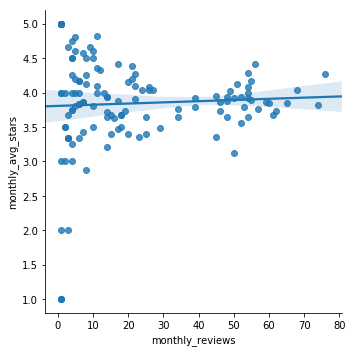

In [29]:
# import itertools
# mks = itertools.cycle(['o', 'x'])
# markers = [next(mks) for i in res["product_category"].unique()]

sns.lmplot(x="monthly_reviews", y="monthly_avg_stars", data=df_h_res,
            palette="Set2")

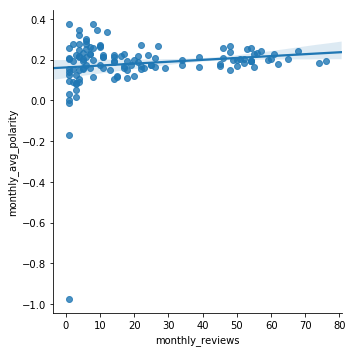

In [30]:
sns.lmplot(x="monthly_reviews", y="monthly_avg_polarity", data=df_h_res,
            palette="Set2")

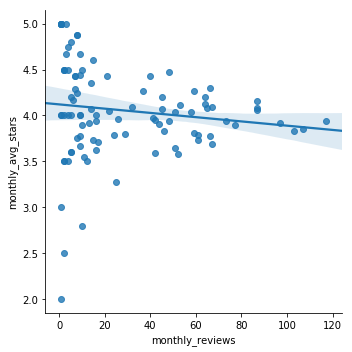

In [32]:
sns.lmplot(x="monthly_reviews", y="monthly_avg_stars", data=df_p_res,
            palette="Set2")

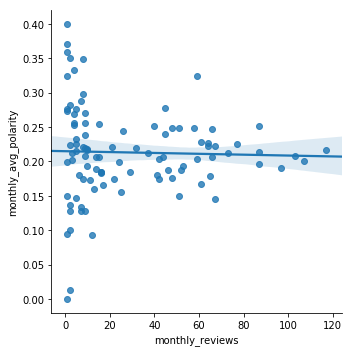

In [33]:
sns.lmplot(x="monthly_reviews", y="monthly_avg_polarity", data=df_p_res,
            palette="Set2")